# Imports

In [7]:
import productomator.production_status as prodst
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# production status

In [8]:
reload(prodst)

<module 'productomator.production_status' from '/Users/htelg/prog/productomator/productomator/production_status.py'>

In [15]:
stat = prodst.load_logs(nodays = 100,
                       path2logs='/Volumes/HOME/.processlogs/')
# pl.Path('/home/grad/htelg/.processlogs/aodinversion1.log').unlink()
assert(len(stat.log) != 0), 'did not found anything ... is the drive mounted?'

jpssscraper_surfrad_allProducts.ini.log has no valid entrys in the last 100 days!!
mfrsr_AOD_lev0.log has no valid entrys in the last 100 days!!
cmrscraper_surfrad_aod.log has no valid entry, skip
goesscraper_surfrad.log has no valid entrys in the last 100 days!!
surfrad_allProducts.log has no valid entrys in the last 100 days!!
srf_langleys.log has no valid entry, skip
scrape_hrrr_gml.log has no valid entrys in the last 100 days!!


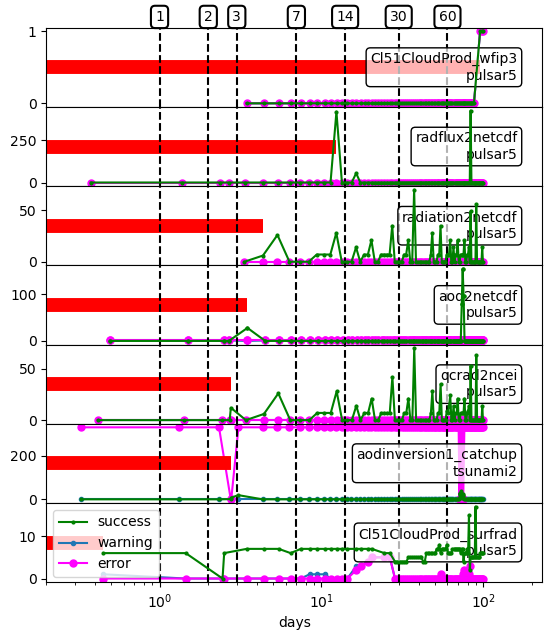

In [16]:
f,aa,leg = stat.plot_time_delta()
f.set_figheight(f.get_figheight() * 1.5)
if 1:
    for a in aa:
        g = a.get_lines()[0] #success
        # g.set_color('black')
        g.set_zorder(100)
        # g.set_markerfacecolor('None')
        g.set_markersize(4)
        
        g = a.get_lines()[2] #error
        g.set_markersize(10)
        g.set_color('magenta')
        # a.set_yscale('log')
        # a.set_xlim(left = 0.001)
    a.legend()
        

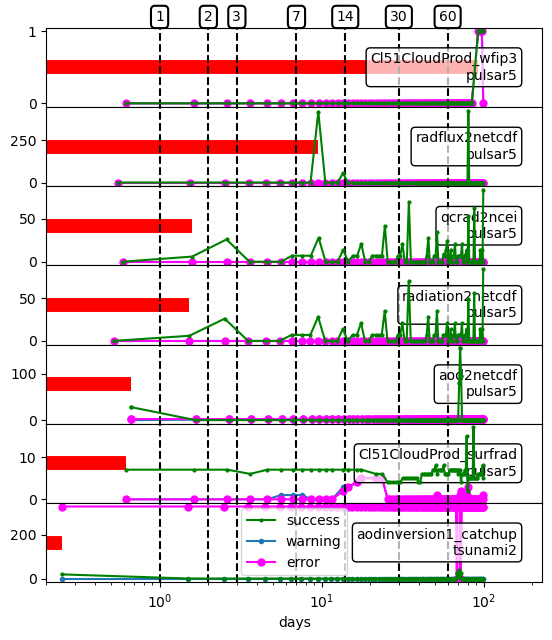

In [6]:
f,aa,leg = stat.plot_time_delta()
f.set_figheight(f.get_figheight() * 1.5)
if 1:
    for a in aa:
        g = a.get_lines()[0] #success
        # g.set_color('black')
        g.set_zorder(100)
        # g.set_markerfacecolor('None')
        g.set_markersize(4)
        
        g = a.get_lines()[2] #error
        g.set_markersize(10)
        g.set_color('magenta')
        # a.set_yscale('log')
        # a.set_xlim(left = 0.001)
    a.legend()
        

In [27]:
'/Volumes/HOME/AOD_retrieval_development/.processlogs/'

10.0

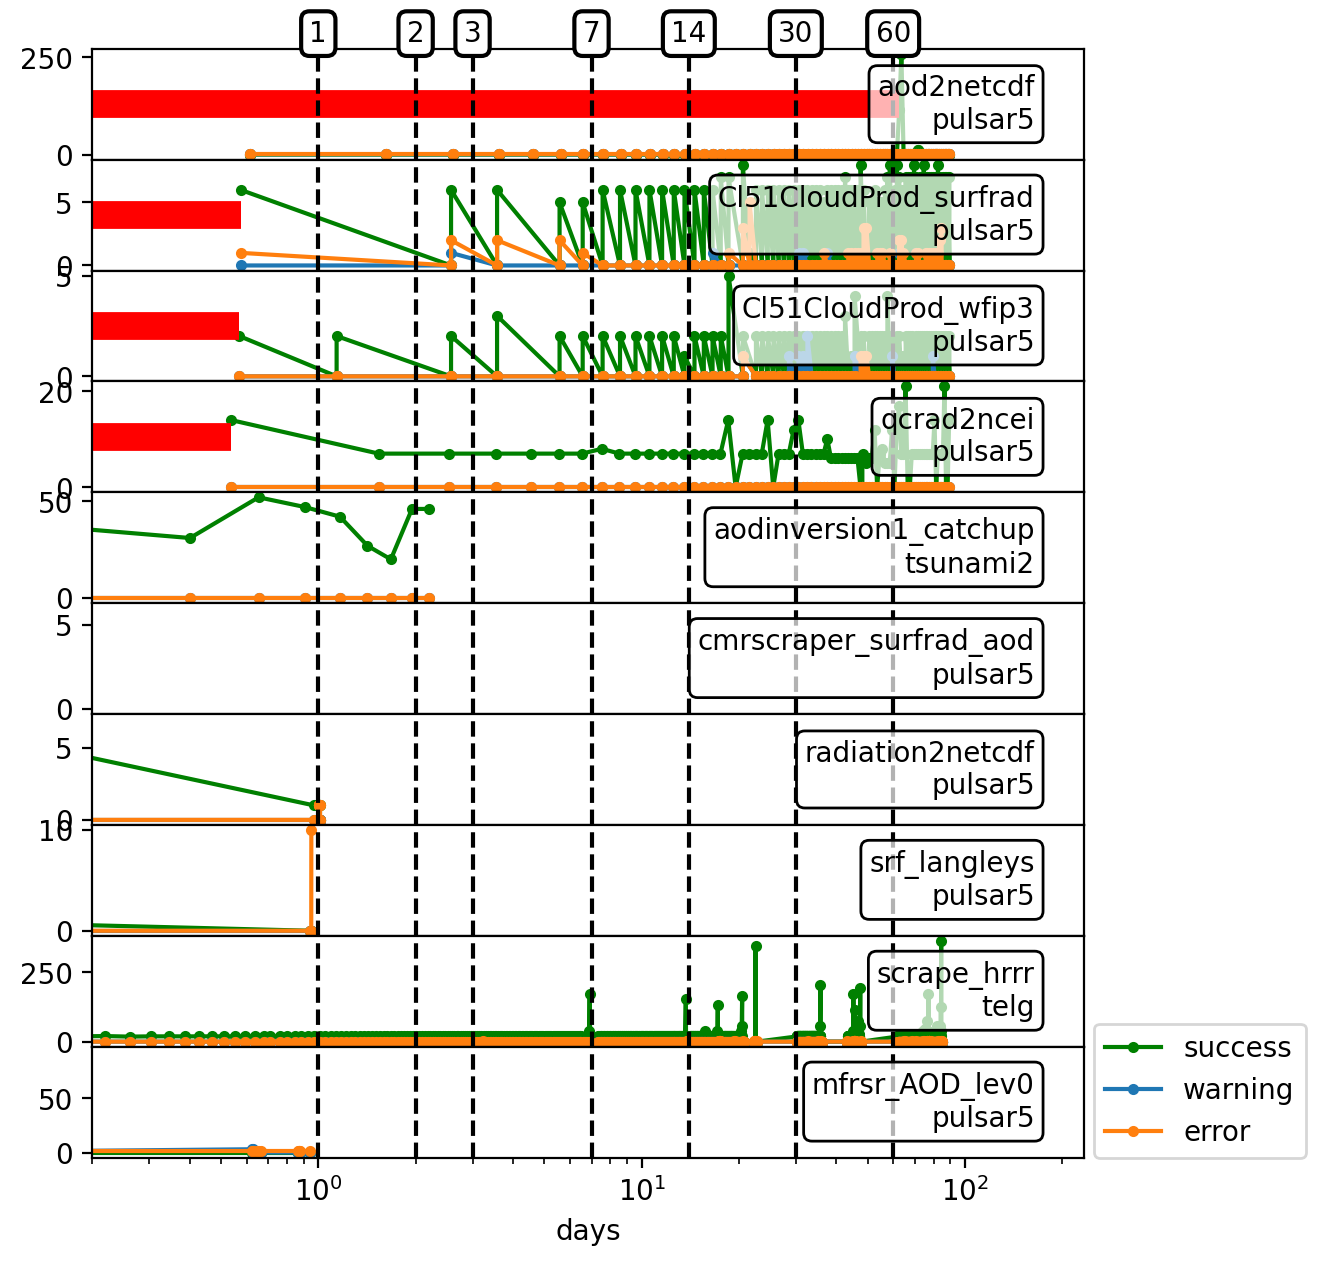

In [65]:
f,aa,leg = stat.plot_time_delta()
f.set_figheight(f.get_figheight() * 1.5)

In [21]:
! tail /home/grad/htelg/script_inits_logs/scrapehrrr.log

[{"exit_status": "newlog"}]

## move outdated to archive

In [20]:
stat.out_of_date

[PosixPath('/home/grad/htelg/.processlogs/jpssscraper_surfrad_allProducts.ini.log'),
 PosixPath('/home/grad/htelg/.processlogs/surfrad_allProducts.log')]

In [68]:
out = stat.out_of_date[2]
out

PosixPath('/home/grad/htelg/.processlogs/Cl51CloudProd_surfrad_catchup.log')

In [69]:
if 0:
    out.rename(out.parent.joinpath('archive').joinpath(out.name))

## move arbitrary to archives

In [21]:
ood = pl.Path('/home/grad/htelg/.processlogs/scrape_hrrr.log')
ood

PosixPath('/home/grad/htelg/.processlogs/scrape_hrrr.log')

In [22]:
if 1:
    ood.rename(ood.parent.joinpath('archive').joinpath(ood.name))

## addressing some errors

In [19]:
import multiprocessing as mp


In [17]:
p2fld = pl.Path('/nfs/stu3data2/Satellite_data/goes/16/AOD/raw/')

In [27]:
files = list(p2fld.glob('*.nc'))

In [28]:
for f in files:
    print(f)
    # f.unlink()

In [20]:
eq = mp.Queue()

In [23]:
try:
    p2f = files[0]#'/nfs/stu3data2/Satellite_data/goes/16/ACM/raw/OR_ABI-L2-ACMC-M6_G16_s20231142131172_e20231142133545_c20231142134496.nc'
    ds = xr.open_dataset(p2f)
    ds.Cloud_Probabilities.plot()
except Exception as e:
    eq.put(e)

In [25]:
eq.empty()

False

In [26]:
while not eq.empty():
    e = eq.get()
    print(e)

list index out of range


In [211]:
isinstance(e, RuntimeError)

True

In [ ]:
raise(e)

In [1]:
p = pl.Path('/nfs/stu3data2/Satellite_data/jpss/NOAA_20/AOD_projected2surfrad')

In [3]:
p.parent.mkdir()

In [33]:
print(pd.Timestamp.now())

2023-08-28 10:04:39.414665


In [214]:
str(e) == 'NetCDF: HDF error'

'NetCDF: HDF error'

# Goes scraper related checks

## find raw files and remove them

In [11]:
path = '/nfs/stu3data2/Satellite_data/goes/'

In [12]:
path = pl.Path(path)

In [13]:
def list_directories_with_depth(path, max_depth):
    if max_depth == 0:
        return []

    directories = []
    for dir_path in path.iterdir():
        if dir_path.is_dir():
            directories.append(dir_path)
            directories.extend(list_directories_with_depth(dir_path, max_depth - 1))

    return directories

In [14]:
max_depth = 3  # Adjust this value to limit the depth
directories = list_directories_with_depth(path, max_depth)

In [15]:
directories = [d for d in directories if d.name == 'raw']

In [16]:
[len(list(d.glob('*'))) for d in directories]

[0, 0, 5, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 7, 0]

In [17]:
# MAKE SURE TO STOP SCRIPTS BEFORE UNLINKING!!!
# Unlink the files
for d in directories:
    for p2f in d.glob('*'):
        p2f.unlink()

In [18]:
[len(list(d.glob('*'))) for d in directories]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

## test - what is the path to the last file that was generated in a folder -r

### memory friendly

In [4]:
def get_newest(path, newest = '19700101', depth = 0):
    path = pl.Path(path)
    np = path
    sep = '    '
    txt = sep*depth + path.name
    print(txt)
    newest = pd.to_datetime(newest)
    newpath = path
    nt = None #needed if path is empty
    p = path
    
    for p in path.glob('*'):
        # print(p)
        if p.is_dir():
            np, nt, files = get_newest(p, newest = newest, depth = depth + 1)
            # if files:
            #     print(f'{nt}\t{np}')
        elif p.is_file():
            np = p
            nt = pd.to_datetime(p.stat().st_ctime, unit='s')
        else:
            assert(False), 'not possible'
        if nt > newest:
            newest = nt
            newpath = np
            # if p.is_dir():
            #     print(f'{nt}\t{np}')
    if np.is_file():
        # try:
        print(sep*depth + f'>>> {nt}\t{np.name}')
        # except UnboundLocalError:
        #     print(sep*depth + '>>> empty')
    return newpath, newest, p.is_file()

In [5]:
# path = '/home/grad/htelg/script_inits_logs/'
path = '/nfs/stu3data2/Satellite_data/goes/'

In [ ]:
newpath, newest, files = get_newest(path)

goes
    17
        ACM
            raw
            projections
                splash
                    v001
                        all
                    all
                    >>> 2023-07-10 09:09:25.862483968	ABI_L2_ACM_projected2splash_20210930_072117.nc
                >>> 2023-07-19 17:39:36.796260096	ABI_L2_ACM_projected2splash_20220830_034117.nc
                surfrad
                    v001
                        all
                    all
                    >>> 2023-04-13 23:17:09.748719104	ABI_L2_ACM_projected2surfrad_20220810_215617.nc
        >>> 2023-07-19 17:39:36.796260096	ABI_L2_ACM_projected2splash_20220830_034117.nc
        archive
            ABI_L2_LST_2021_PNW_heatwave_concat
            >>> 2023-06-29 16:56:06.201497088	ABI_L2_LST_2021_PNW_heatwave_20210627.nc
            ABI_L2_LST_projected2splash_concat
            >>> 2023-07-18 22:09:48.109755904	ABI_L2_LST_projected2splash_20220203.nc
            ABI_L2_AOD_projected2pnnl
            >>> 2023-04-

In [10]:
newpath, newest, files

(PosixPath('/nfs/stu3data2/Satellite_data/goes/17/AOD/projections/surfrad/v001/all/ABI_L2_AOD_projected2surfrad_20220708_234617.nc'),
 Timestamp('2023-10-27 05:01:04.254673920'),
 False)

In [8]:
newpath, newest, files

(PosixPath('/nfs/stu3data2/Satellite_data/goes/18/AOD/raw/OR_ABI-L2-AODC-M6_G18_s20223210226173_e20223210228546_c20223210230589.nc'),
 Timestamp('2023-10-19 21:40:04.181660928'),
 False)

In [ ]:
newpath, newest, files = get_newest(path)

2023-09-06 16:42:07.637289984	/nfs/stu3data2/Satellite_data/goes/17/ACM/raw/OR_ABI-L2-ACMC-M6_G17_s20212440051177_e20212440053550_c20212440054323.nc
2023-09-06 16:42:07.637289984	/nfs/stu3data2/Satellite_data/goes/17/ACM/raw/OR_ABI-L2-ACMC-M6_G17_s20212440051177_e20212440053550_c20212440054323.nc
2023-09-17 15:43:59.242641920	/nfs/stu3data2/Satellite_data/goes/17/ADP/projections/splash/v001/all/ABI_L2_ADP_projected2splash_20230110_144113.nc
2023-09-17 15:43:59.242641920	/nfs/stu3data2/Satellite_data/goes/17/ADP/projections/splash/v001/all/ABI_L2_ADP_projected2splash_20230110_144113.nc
2023-09-17 15:43:59.242641920	/nfs/stu3data2/Satellite_data/goes/17/ADP/projections/splash/v001/all/ABI_L2_ADP_projected2splash_20230110_144113.nc
2023-09-17 15:43:59.242641920	/nfs/stu3data2/Satellite_data/goes/17/ADP/projections/splash/v001/all/ABI_L2_ADP_projected2splash_20230110_144113.nc
2023-09-17 15:43:59.242641920	/nfs/stu3data2/Satellite_data/goes/17/ADP/projections/splash/v001/all/ABI_L2_ADP_pro

In [ ]:
newpath

newest

In [38]:
p = pl.Path('/home/grad/htelg/script_inits_logs/goesscraper/splash_all2.log')

In [45]:
pd.to_datetime(p.stat().st_ctime, unit='s')

Timestamp('2023-06-22 18:03:01.803225088')

In [44]:
bla = p.stat()
bla.st_ctime

1687456981.803225